# Class: STATS 507
Professor: Keith, Levin 

Student: Martin, Zanaj, mzanaj@umich.edu

Homework 9

I have not disclosed my code with no additional individual. 

In [23]:
#Question 1, ~ 2 hours 
class Trie():
    #a.
    def __init__(self):
        self.root = dict()
        
    #b.
    def add(self,s):
        my_dict = self.root
        #Check each char
        for x in s:
            
            #If already in, keep going further
            if x in my_dict:
                my_dict= my_dict[x]
                
            #If, not create new dict
            else:
                my_dict[x] = dict()
                my_dict= my_dict[x]
            
        #last element (end of word)
        my_dict[''] = None
    #c.
    def contains(self,s):

        #Check if word exsits
        def contains_helper(s,d):
            
            #Last character
            if(s==''):
                #Is it the last char in my_dict too?
                if('' in d):
                    return True
                else:
                    return False

            #Doesn't exsist
            if(s[0] not in d):
                return False
            #Return all chars minus previous
            else:
                return contains_helper(s[1:],d[s[0]])

        #True of False    
        return contains_helper(s,self.root)
    #d
    def __repr__(self):
        return repr(self.root)
#2.
def wordlist2trie(user_input):
    #Check if list
    if(type(user_input) is not list):
        raise TypeError("Please, ensure input of type list")
    
    #Chek [all] are strings
    for x in user_input:
        if(type(x) is not str):
            raise TypeError("Please ensure that all elements in list are of type str")
            break
        else:
            continue
    #Trie data strcut
    my_trie = Trie()
    
    #Add all words
    for x in user_input:
        my_trie.add(x)
        
    return my_trie

#Test
#l = ()
#s = [1,2,3]
#l2 = ["cat", "catz", "catzs"]
#my_trie = []
#wordlist2trie(l)  

#3. 
#Use urllib to open the  link 
import urllib.request

html = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt').read()

#Removes all the shlashes & puts in a readable format
s= html.decode('ASCII', 'strict') 

#Transform into list
l = list(s.split())
#print(l)

#Transform into Tire
big_trie = wordlist2trie(l)

#print(big_trie) 

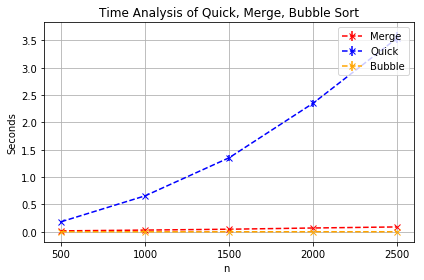

In [15]:
#Question 2, ~ 4 hours
#1.
#Mergesort
#reference wikipedia: https://en.wikipedia.org/wiki/Merge_sort
def merge(left,right):
        result = []
        while ( len(left)>0 and len(right)>0):
            if(left[0]<=right[0]):
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
                
        #remaining elements
        while(len(left)>0):
            result.append(left[0])
            left =left[1:]
        while(len(right)>0):
            result.append(right[0])
            right = right[1:]
        return result

def mergesort(user_input):           
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    
    #Base Case
    if(len(user_input)<=1):
        return user_input

    #Divide into two
    left = []
    right = []
    
    for x in range(len(user_input)):
        if(x< len(user_input)/2):
            left.append(user_input[x])
        else:
            right.append(user_input[x])
            
    left = mergesort(left)
    right = mergesort(right)
    
    return merge(left, right)
    
#Test
#l=()
#l=["a"]
#l = [100,20,2,90,4,0]
#print(mergesort(l))

#Quicksort 
#reference: slides
def quicksort(user_input):
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
            
    if len(user_input) <=1:
        return user_input
    
    (less, mid, more) = (list(),list(),list())
    
    #Pivot last element
    last = int(len(user_input)-1)
    pivot = user_input[last]
    mid.append(pivot)
    
    for i in range(len(user_input)-1):
        if user_input[i] == pivot:
            mid.append(user_input[i])
        elif user_input[i]< pivot:
            less.append(user_input[i])
        else:
            more.append(user_input[i])
    return quicksort(less) + mid + quicksort(more)
#Test        
#l= [3,1,4,100,9]        
#quicksort(l) 

#Bubble Sort 
#reference: https://en.wikipedia.org/wiki/Bubble_sort
def bubblesort(user_input):
     #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    n = len(user_input)
    
    while n>1:
        n2 = 0
        for i in range(1,n-1):
            if(user_input[i-1]> user_input[i]):
                temp = user_input[i-1]
                user_input[i-1]= user_input[i]
                user_input[i] = temp
                n2=i
        n= n2
    return user_input
        
#Test        
#l= [100,3,1,4,100,9]        
#bubblesort(l)    

#2.
import time
def run_timing_expt(user_input):
    
    #Mergesort
    start_merge = time.time()
    mergesort(user_input)
    end_merge = time.time()- start_merge
    
    #Quicksort
    start_quick = time.time()
    quicksort(user_input)
    end_quick = time.time()- start_quick
    
    #Bubblesort
    start_bubble = time.time()
    bubblesort(user_input)
    end_bubble = time.time()- start_bubble
    
    my_tuple= (end_merge, end_quick, end_bubble)
    
    return my_tuple
    

#Test
#l = [10,2,1,9,90,91,80]
#type(run_timing_expt(l))

#3.
import statistics 
import math
n = [500, 1000, 1500, 2000, 2500]

mean_merge = []
mean_quick = []
mean_bubble = []

std_merge = []
std_quick = []
std_bubble = []

#Get data 
for x in n:
    
    #Save data for each iteration of n
    my_merge = []
    my_quick= []
    my_bubble = []
    
    #Call 20 times
    for y in range(20):
        
        #List form
        a = run_timing_expt(list(range(x)))
        
        #merge, quick, and bubble
        b = a[0]
        c = a[1]
        d = a[2]
        
        #Local results
        my_merge.append(b)
        my_quick.append(c)
        my_bubble.append(d)
        
    #Mean of local results
    mean_merge.append(statistics.mean(my_merge))
    mean_quick.append(statistics.mean(my_quick))
    mean_bubble.append(statistics.mean(my_bubble))
    
    #Std of local results 
    std_merge.append(2*statistics.stdev(my_merge)/math.sqrt(20))
    std_quick.append(2*statistics.stdev(my_quick)/math.sqrt(20))
    std_bubble.append(2*statistics.stdev(my_bubble)/math.sqrt(20))
    
import matplotlib.pyplot as plt
 
#Plot
plt.errorbar(n, mean_merge, yerr=std_merge, fmt='x', color= 'red',linestyle='dashed', label = "Merge")
plt.errorbar(n, mean_quick, yerr=std_quick, fmt='x', color= 'blue',linestyle='dashed',label = "Quick")
plt.errorbar(n, mean_bubble, yerr=std_bubble, fmt='x', color= 'orange',linestyle='dashed',label = "Bubble")

#Graph info
plt.ylabel('Seconds')
plt.xlabel('n ')
plt.title('Time Analysis of Quick, Merge, Bubble Sort')

#Extras
plt.legend(loc=1)
plt.xticks(n)
plt.grid()
_= plt.tight_layout()


#Sava plot to  a pdf
fname= 'ascending.pdf'
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',orientation='portrait')

#The pivot for quicksort is the last element.This will cause the function to reach a total of 2n recursion calls and 
#in the case of 2500, we will have approximately ~5000 recursion calls which is the upper bound, and perhaps the program
#might crash due to a limitation error. Overall, on a large dataset this is quite inefficient. 


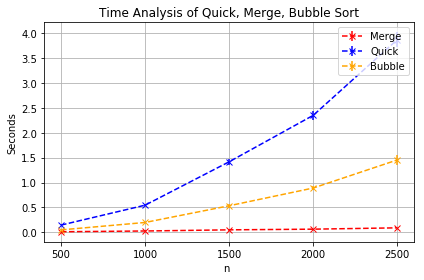

In [16]:
#4. 
def merge(left,right):
        result = []
        while ( len(left)>0 and len(right)>0):
            if(left[0]<=right[0]):
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
                
        #remaining elements
        while(len(left)>0):
            result.append(left[0])
            left =left[1:]
        while(len(right)>0):
            result.append(right[0])
            right = right[1:]
        return result

def mergesort(user_input):           
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    
    #Base Case
    if(len(user_input)<=1):
        return user_input

    #Divide into two
    left = []
    right = []
    
    for x in range(len(user_input)):
        if(x< len(user_input)/2):
            left.append(user_input[x])
        else:
            right.append(user_input[x])
            
    left = mergesort(left)
    right = mergesort(right)
    
    return merge(left, right)
    
#Test
#l=()
#l=["a"]
#l = [100,20,2,90,4,0]
#print(mergesort(l))

#Quicksort 
#reference: slides
def quicksort(user_input):
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
            
    if len(user_input) <=1:
        return user_input
    
    (less, mid, more) = (list(),list(),list())
    
    #Pivot last element
    last = int(len(user_input)-1)
    pivot = user_input[last]
    mid.append(pivot)
    
    for i in range(len(user_input)-1):
        if user_input[i] == pivot:
            mid.append(user_input[i])
        elif user_input[i]< pivot:
            less.append(user_input[i])
        else:
            more.append(user_input[i])
    return quicksort(less) + mid + quicksort(more)
#Test        
#l= [3,1,4,100,9]        
#quicksort(l) 

#Bubble Sort 
#reference: https://en.wikipedia.org/wiki/Bubble_sort
def bubblesort(user_input):
     #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    n = len(user_input)
    
    while n>1:
        n2 = 0
        for i in range(1,n-1):
            if(user_input[i-1]> user_input[i]):
                temp = user_input[i-1]
                user_input[i-1]= user_input[i]
                user_input[i] = temp
                n2=i
        n= n2
    return user_input
        
#Test        
#l= [100,3,1,4,100,9]        
#bubblesort(l)    

#2.
import time
def run_timing_expt(user_input):
    
    #Mergesort
    start_merge = time.time()
    mergesort(user_input)
    end_merge = time.time()- start_merge
    
    #Quicksort
    start_quick = time.time()
    quicksort(user_input)
    end_quick = time.time()- start_quick
    
    #Bubblesort
    start_bubble = time.time()
    bubblesort(user_input)
    end_bubble = time.time()- start_bubble
    
    my_tuple= (end_merge, end_quick, end_bubble)
    
    return my_tuple

import statistics 
import math

n = [500, 1000, 1500, 2000, 2500]
mean_merge2 = []
mean_quick2 = []
mean_bubble2 = []

std_merge2 = []
std_quick2 = []
std_bubble2 = []

#Get data 
for x in n:
    
    #Save data for each iteration of n
    my_merge = []
    my_quick= []
    my_bubble = []
    
    #Call 20 times
    for y in range(20):
        
        #List form
        a = run_timing_expt(sorted(list(range(x)), reverse=True))
        
        #merge, quick, and bubble
        b = a[0]
        c = a[1]
        d = a[2]
        
        #Local results
        my_merge.append(b)
        my_quick.append(c)
        my_bubble.append(d)
        
    #Mean of local results
    mean_merge2.append(statistics.mean(my_merge))
    mean_quick2.append(statistics.mean(my_quick))
    mean_bubble2.append(statistics.mean(my_bubble))
    
    #Std of local results 
    std_merge2.append(2*statistics.stdev(my_merge)/math.sqrt(20))
    std_quick2.append(2*statistics.stdev(my_quick)/math.sqrt(20))
    std_bubble2.append(2*statistics.stdev(my_bubble)/math.sqrt(20))
    
#Plot
plt.errorbar(n, mean_merge2, yerr=std_merge2, fmt='x', color= 'red',linestyle='dashed', label = "Merge")
plt.errorbar(n, mean_quick2, yerr=std_quick2, fmt='x', color= 'blue',linestyle='dashed',label = "Quick")
plt.errorbar(n, mean_bubble2, yerr=std_bubble2, fmt='x', color= 'orange',linestyle='dashed',label = "Bubble")

#Graph info
plt.ylabel('Seconds')
plt.xlabel('n ')
plt.title('Time Analysis of Quick, Merge, Bubble Sort')

#Extras
plt.legend(loc=1)
plt.xticks(n)
plt.grid()
_= plt.tight_layout()


#Sava plot to  a pdf
fname2= 'descending.pdf'
plt.savefig(fname2, dpi=None, facecolor='w', edgecolor='w',orientation='portrait')


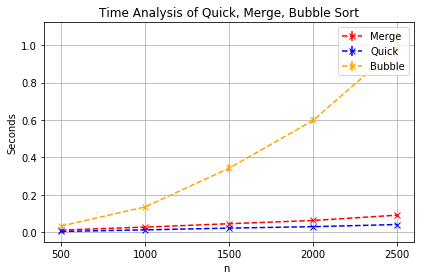

In [17]:
#5.
def merge(left,right):
        result = []
        while ( len(left)>0 and len(right)>0):
            if(left[0]<=right[0]):
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
                
        #remaining elements
        while(len(left)>0):
            result.append(left[0])
            left =left[1:]
        while(len(right)>0):
            result.append(right[0])
            right = right[1:]
        return result

def mergesort(user_input):           
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    
    #Base Case
    if(len(user_input)<=1):
        return user_input

    #Divide into two
    left = []
    right = []
    
    for x in range(len(user_input)):
        if(x< len(user_input)/2):
            left.append(user_input[x])
        else:
            right.append(user_input[x])
            
    left = mergesort(left)
    right = mergesort(right)
    
    return merge(left, right)
    
#Test
#l=()
#l=["a"]
#l = [100,20,2,90,4,0]
#print(mergesort(l))

#Quicksort 
#reference: slides
def quicksort(user_input):
    #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
            
    if len(user_input) <=1:
        return user_input
    
    (less, mid, more) = (list(),list(),list())
    
    #Pivot last element
    last = int(len(user_input)-1)
    pivot = user_input[last]
    mid.append(pivot)
    
    for i in range(len(user_input)-1):
        if user_input[i] == pivot:
            mid.append(user_input[i])
        elif user_input[i]< pivot:
            less.append(user_input[i])
        else:
            more.append(user_input[i])
    return quicksort(less) + mid + quicksort(more)
#Test        
#l= [3,1,4,100,9]        
#quicksort(l) 

#Bubble Sort 
#reference: https://en.wikipedia.org/wiki/Bubble_sort
def bubblesort(user_input):
     #Check list
    if(type(user_input) is not list):
        raise TypeError("Ensure that input is of type list")
    
    #Check elements
    for x in user_input:
        if(type(x) is not float and type(x) is not int):
            raise TypeError("Ensure that each element is of  type float/int")
    n = len(user_input)
    
    while n>1:
        n2 = 0
        for i in range(1,n-1):
            if(user_input[i-1]> user_input[i]):
                temp = user_input[i-1]
                user_input[i-1]= user_input[i]
                user_input[i] = temp
                n2=i
        n= n2
    return user_input
        
#Test        
#l= [100,3,1,4,100,9]        
#bubblesort(l)    

#2.
import time
def run_timing_expt(user_input):
    
    #Mergesort
    start_merge = time.time()
    mergesort(user_input)
    end_merge = time.time()- start_merge
    
    #Quicksort
    start_quick = time.time()
    quicksort(user_input)
    end_quick = time.time()- start_quick
    
    #Bubblesort
    start_bubble = time.time()
    bubblesort(user_input)
    end_bubble = time.time()- start_bubble
    
    my_tuple= (end_merge, end_quick, end_bubble)
    
    return my_tuple


import statistics 
import math
import random

n = [500, 1000, 1500, 2000, 2500]
mean_merge3 = []
mean_quick3 = []
mean_bubble3 = []

std_merge3 = []
std_quick3 = []
std_bubble3 = []

#Get data 
for x in n:
    
    #Save data for each iteration of n
    my_merge = []
    my_quick= []
    my_bubble = []
    
    #Call 20 times
    for y in range(20):
        
        #List form
        a = run_timing_expt([random.random() for _ in range(x)])
        
        #merge, quick, and bubble
        b = a[0]
        c = a[1]
        d = a[2]
        
        #Local results
        my_merge.append(b)
        my_quick.append(c)
        my_bubble.append(d)
        
    #Mean of local results
    mean_merge3.append(statistics.mean(my_merge))
    mean_quick3.append(statistics.mean(my_quick))
    mean_bubble3.append(statistics.mean(my_bubble))
    
    #Std of local results 
    std_merge3.append(2*statistics.stdev(my_merge)/math.sqrt(20))
    std_quick3.append(2*statistics.stdev(my_quick)/math.sqrt(20))
    std_bubble3.append(2*statistics.stdev(my_bubble)/math.sqrt(20))
    
#Plot
plt.errorbar(n, mean_merge3, yerr=std_merge3, fmt='x', color= 'red',linestyle='dashed', label = "Merge")
plt.errorbar(n, mean_quick3, yerr=std_quick3, fmt='x', color= 'blue',linestyle='dashed',label = "Quick")
plt.errorbar(n, mean_bubble3, yerr=std_bubble3, fmt='x', color= 'orange',linestyle='dashed',label = "Bubble")

#Graph info
plt.ylabel('Seconds')
plt.xlabel('n ')
plt.title('Time Analysis of Quick, Merge, Bubble Sort')

#Extras
plt.legend(loc=1)
plt.xticks(n)
plt.grid()
_= plt.tight_layout()


#Sava plot to  a pdf
fname3= 'random.pdf'
plt.savefig(fname3, dpi=None, facecolor='w', edgecolor='w',orientation='portrait')